In [5]:
# Import necessary libraries
import pandas as pd

# Load the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Inspect the data
# Display the first few rows of the dataset
print("First few rows of the training dataset:")
print(train_data.head())

# Get an overview of the dataset
print("\nSummary of the training dataset:")
print(train_data.info())

# Statistical summary of the dataset
print("\nStatistical summary of the training dataset:")
print(train_data.describe())

# Check for missing values
print("\nMissing values in the training dataset:")
print(train_data.isnull().sum())

# Display the first few rows of the test dataset
print("\nFirst few rows of the test dataset:")
print(test_data.head())

# Get an overview of the test dataset
print("\nSummary of the test dataset:")
print(test_data.info())

# Statistical summary of the test dataset
print("\nStatistical summary of the test dataset:")
print(test_data.describe())

# Check for missing values in the test dataset
print("\nMissing values in the test dataset:")
print(test_data.isnull().sum())


First few rows of the training dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

<ipython-input-9-6e13a66694c0>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0


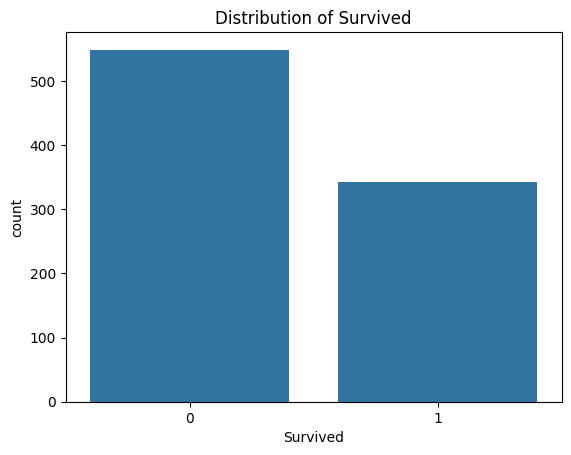

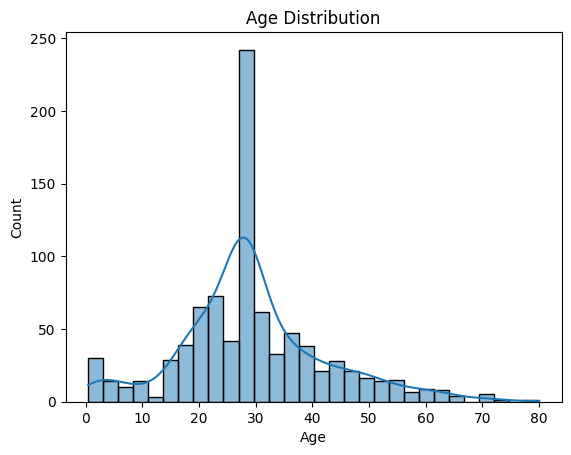

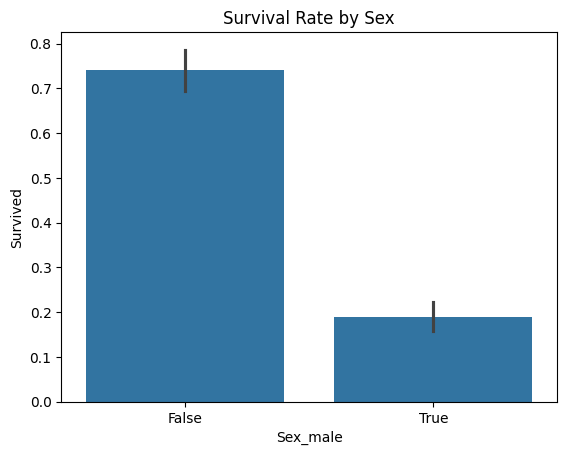

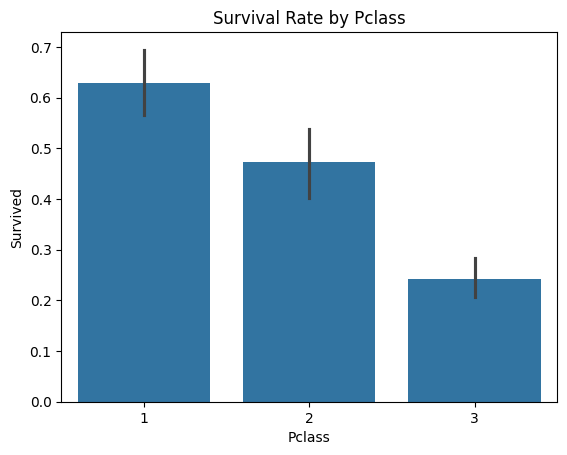

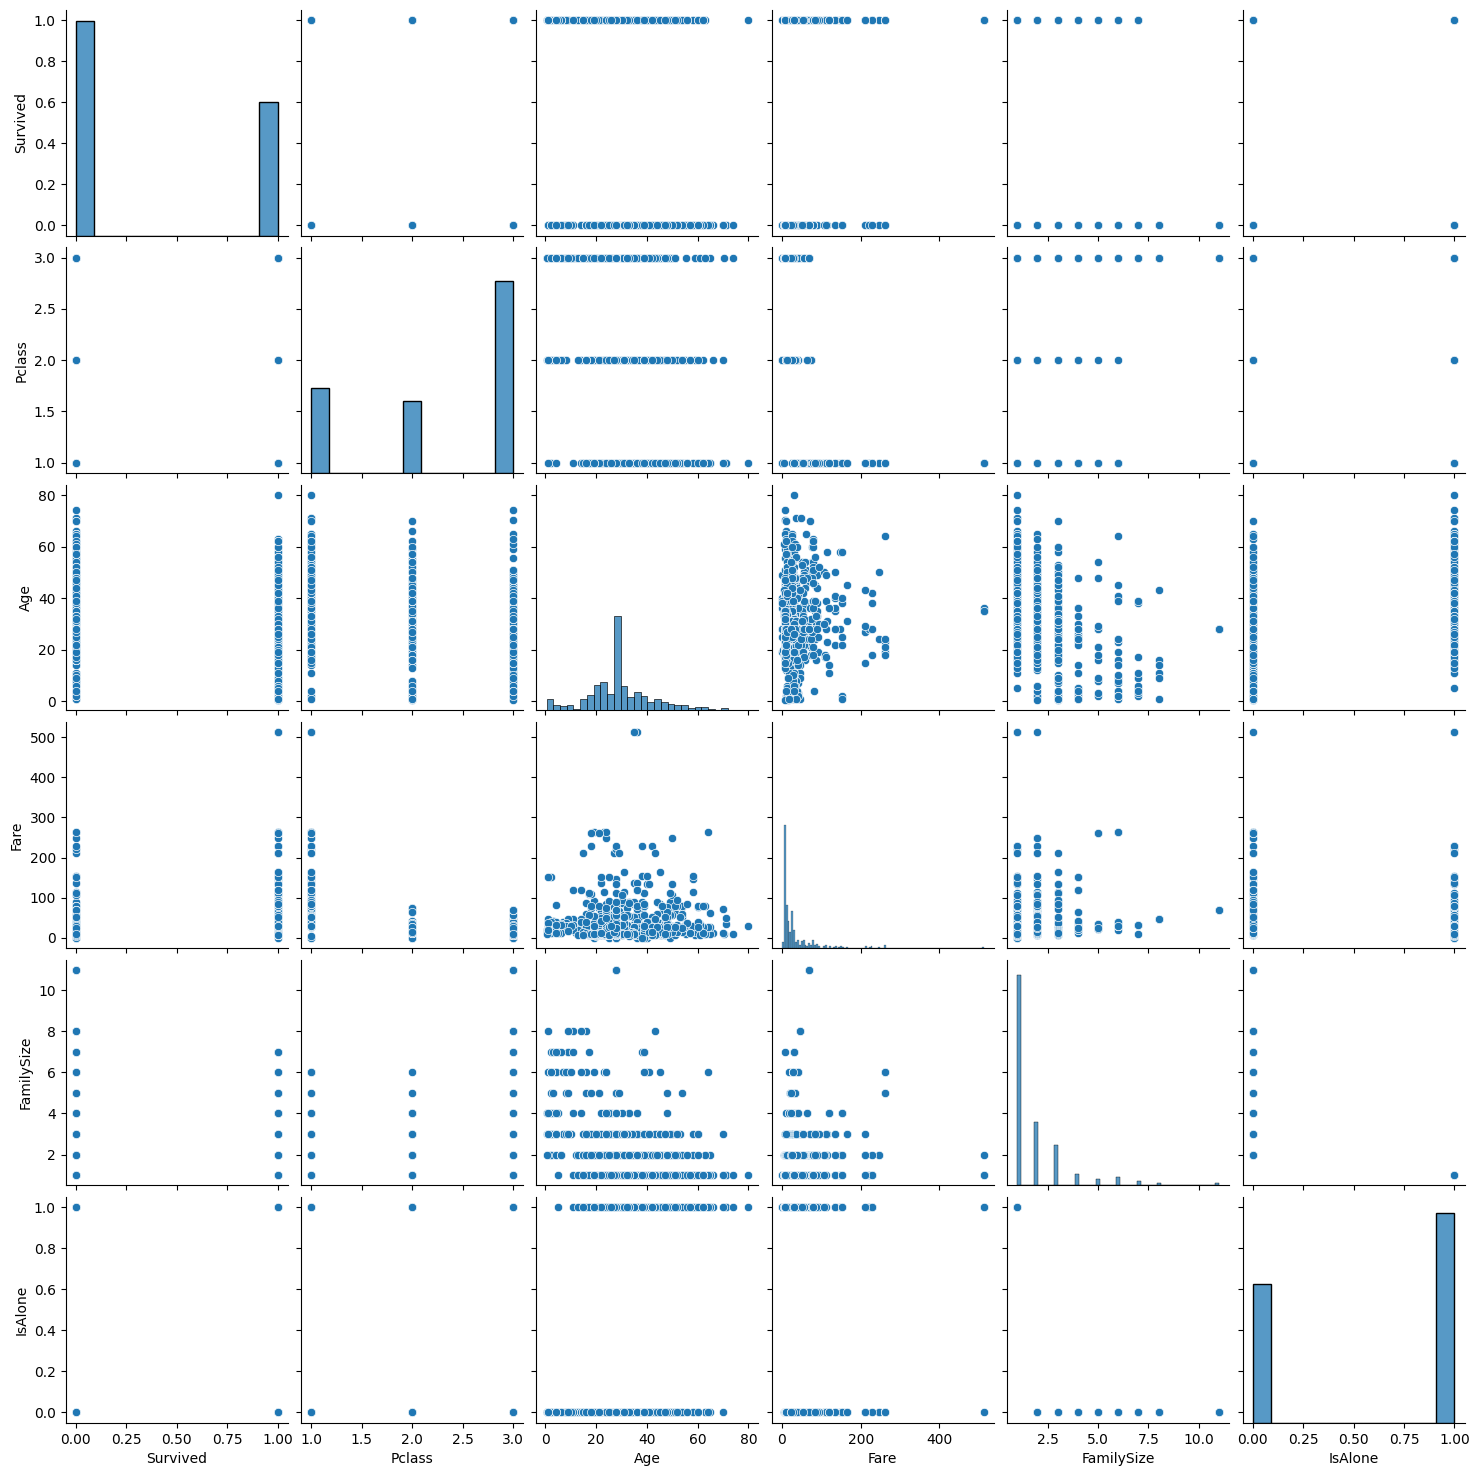

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Inspect the data
print(train_data.info())
print(train_data.describe())
print(train_data.head())

# Handle missing values
# Check for missing values
print(train_data.isnull().sum())

# Fill missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data['Cabin'].fillna('Unknown', inplace=True)

# Drop the 'Cabin' column (or any other column if not necessary)
# train_data.drop(columns=['Cabin'], inplace=True)

# Feature engineering
# Create new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create new feature 'IsAlone'
train_data['IsAlone'] = 1
train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0

# Convert categorical variables into numeric
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

# EDA: Summary statistics
print(train_data.describe())

# EDA: Visualizations
# Distribution of 'Survived'
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')
plt.show()

# Age distribution
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Survival rate by Sex
sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Pclass
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.show()


# Pairplot to see relationships between features
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone']])
plt.show()

First few rows of the training dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

<ipython-input-12-450a5711590d>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0  # Set to 0 (False) if FamilySize > 1


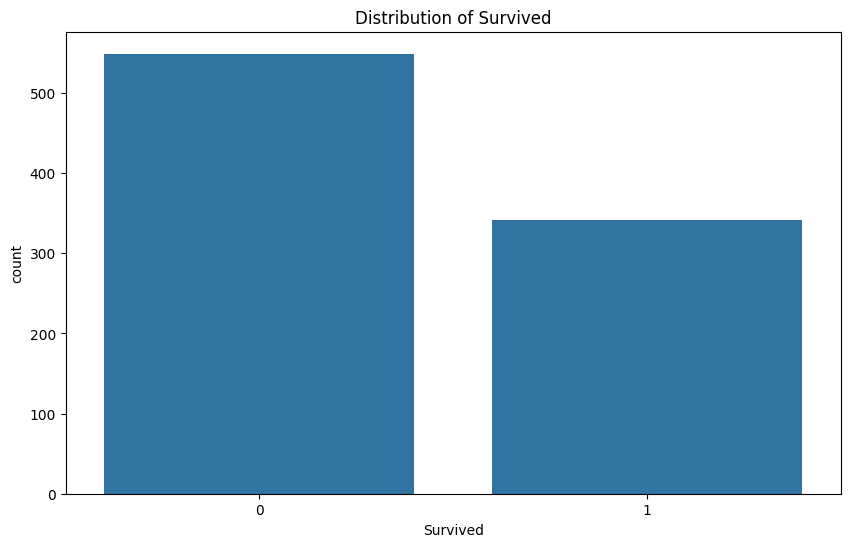

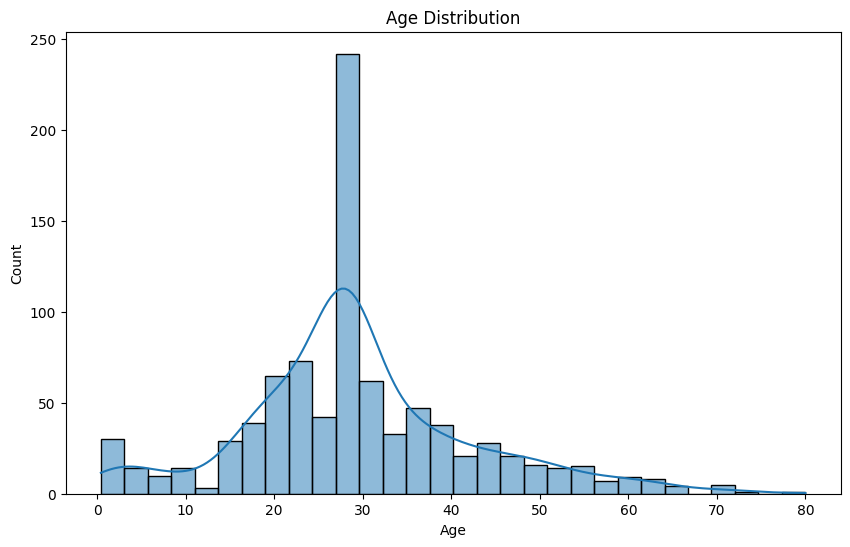

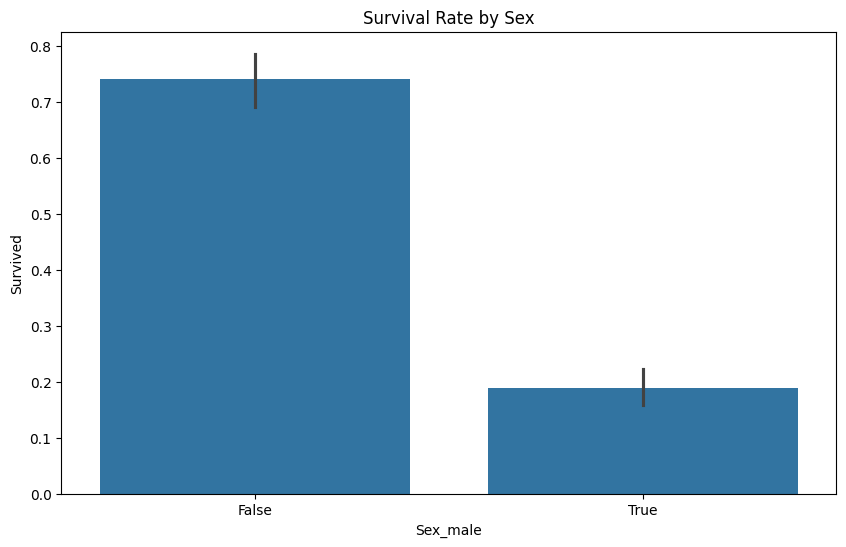

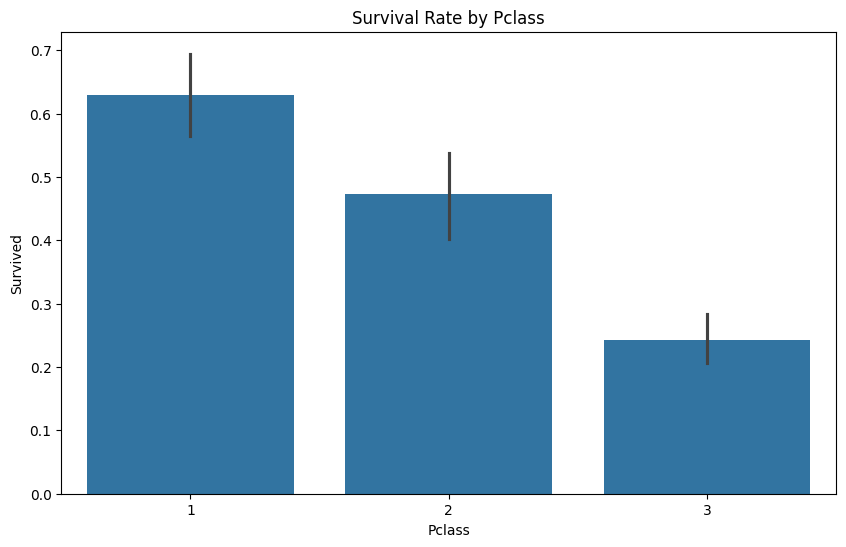

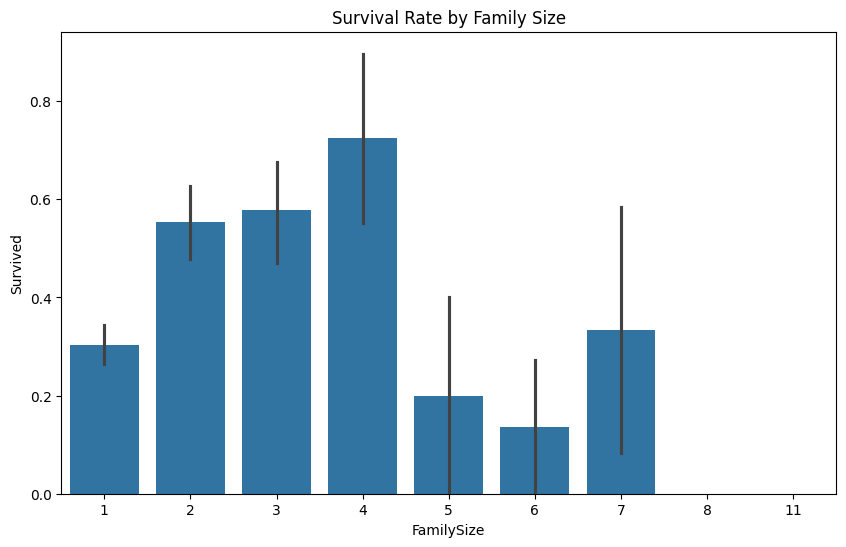

<Figure size 1200x800 with 0 Axes>

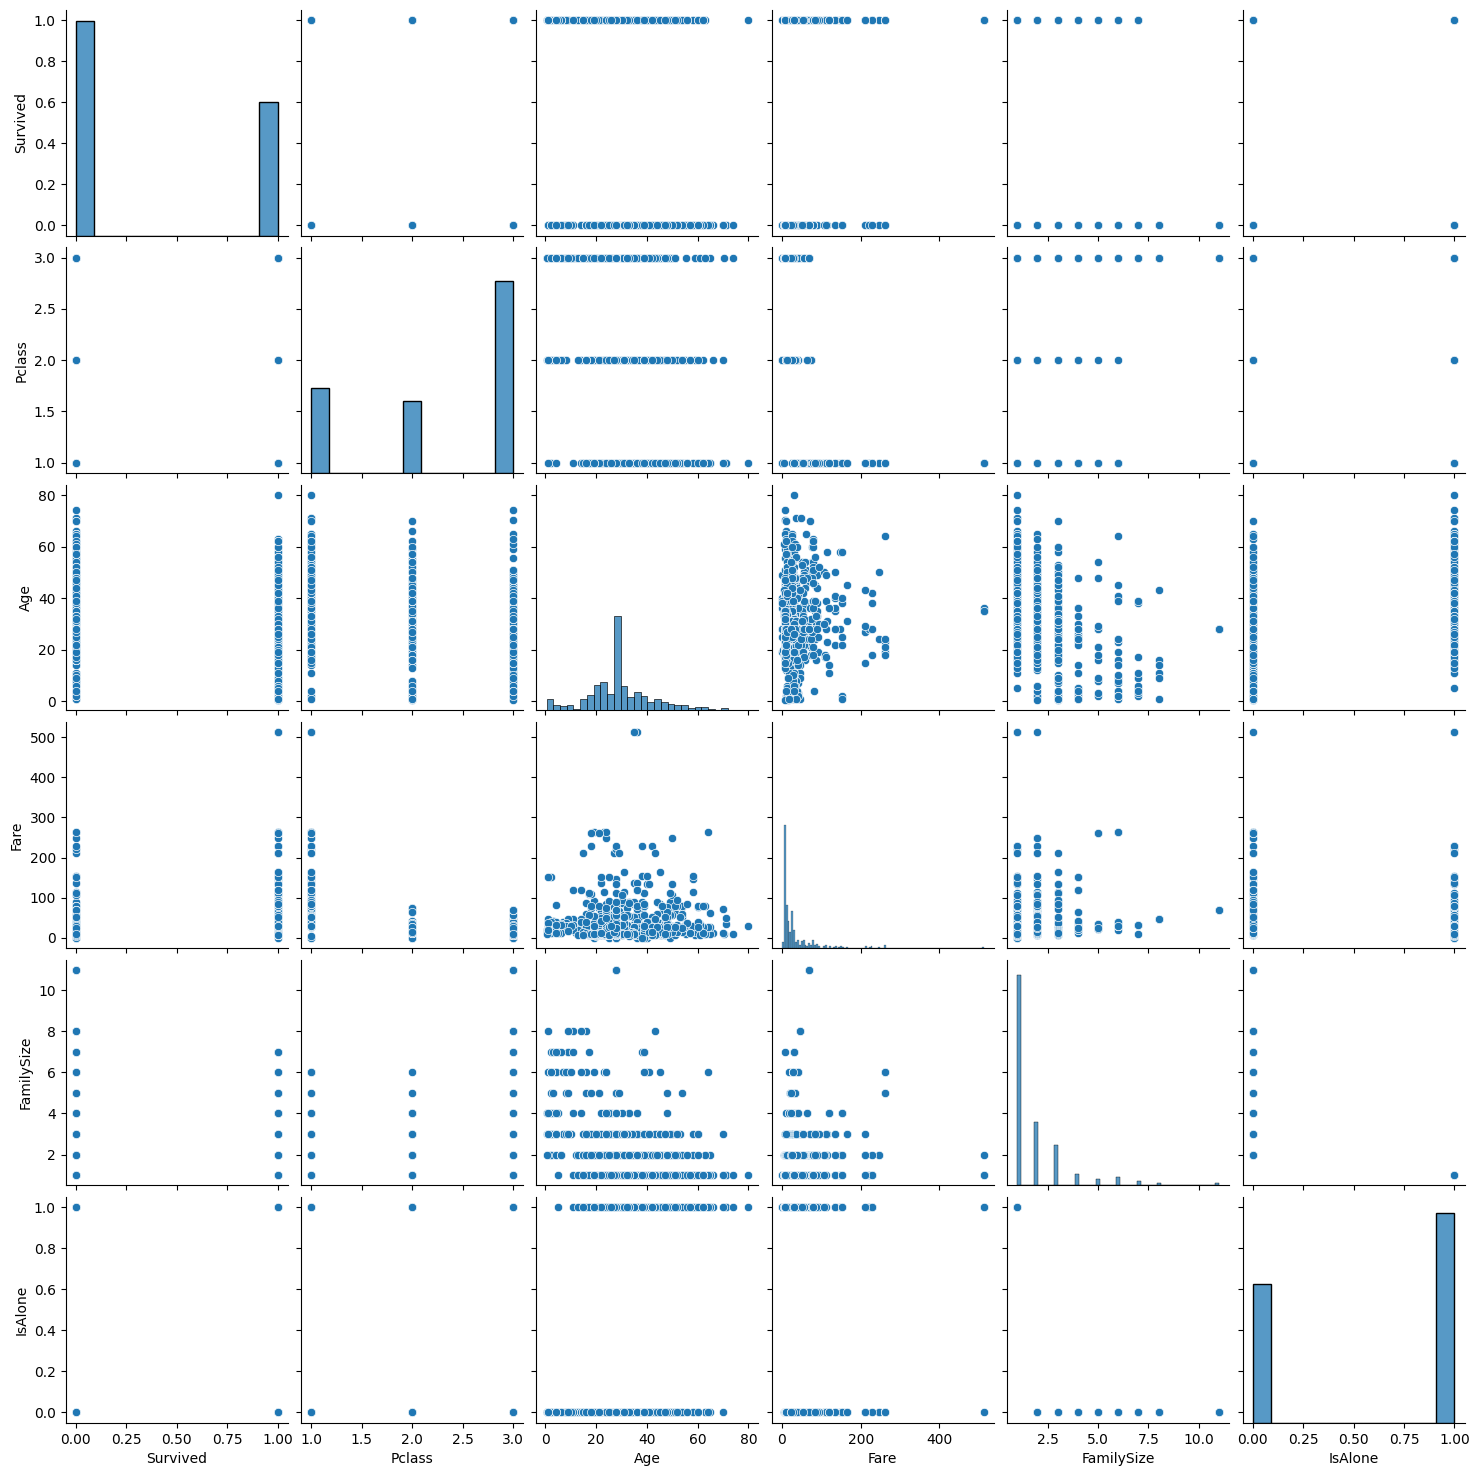

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Inspect the data
print("First few rows of the training dataset:")
print(train_data.head())

print("\nSummary of the training dataset:")
print(train_data.info())

print("\nStatistical summary of the training dataset:")
print(train_data.describe())

print("\nMissing values in the training dataset:")
print(train_data.isnull().sum())

# Handle missing values
# Fill missing Age values with the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
# Fill missing Embarked values with the mode
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
# Fill missing Cabin values with 'Unknown'
train_data['Cabin'].fillna('Unknown', inplace=True)

# Feature engineering
# Create a new feature 'FamilySize'
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1

# Create a new feature 'IsAlone'
train_data['IsAlone'] = 1  # Initializing to 1 (True)
train_data['IsAlone'].loc[train_data['FamilySize'] > 1] = 0  # Set to 0 (False) if FamilySize > 1

# Convert categorical variables into numeric
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'])

# EDA: Summary statistics
print("\nStatistical summary of the cleaned training dataset:")
print(train_data.describe())

# EDA: Visualizations
# Distribution of 'Survived'
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=train_data)
plt.title('Distribution of Survived')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='Sex_male', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Pclass')
plt.show()

# Survival rate by FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=train_data)
plt.title('Survival Rate by Family Size')
plt.show()

# Pairplot to see relationships between features
plt.figure(figsize=(12, 8))
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'IsAlone']])
plt.show()
